## PRACTICO 1:
    
# INTEGRANTES:
  - CERINO FRANCO
  - PAEZ GASTON
  - ZACCO FRANCO



Introduccion:
    Durante este práctico vamos a trabajar sobre el dataset Human Freedom Index 2018 de el instituto Cato. Este índice mide 
    en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos 
    aspectos, hasta obtener un coeficiente entre 1 y 10. Usaremos una versión ya limpia del dataset que pueden descargar 
    desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

Rule of Law
Security and Safety
Movement
Religion
Association, Assembly, and Civil Society
Expression and Information
Identity and Relationships
Size of Government
Legal System and Property Rights
Access to Sound Money
Freedom to Trade Internationally
Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a Identity and 
Relationships en paises de Latinoamérica, y los compararemos con las estadísticas globales.

In [5]:
import matplotlib.pyplot as plt
import numpy 
import pandas
import seaborn
from scipy import stats

In [6]:
#Lectura y breve descripcion dimensional del dataset
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [7]:
#Exploracion de variables
dataset.columns [30:80]

Index(['pf_religion_restrictions', 'pf_religion', 'pf_association_association',
       'pf_association_assembly', 'pf_association_political_establish',
       'pf_association_political_operate', 'pf_association_political',
       'pf_association_prof_establish', 'pf_association_prof_operate',
       'pf_association_prof', 'pf_association_sport_establish',
       'pf_association_sport_operate', 'pf_association_sport',
       'pf_association', 'pf_expression_killed', 'pf_expression_jailed',
       'pf_expression_influence', 'pf_expression_control',
       'pf_expression_cable', 'pf_expression_newspapers',
       'pf_expression_internet', 'pf_expression', 'pf_identity_legal',
       'pf_identity_parental_marriage', 'pf_identity_parental_divorce',
       'pf_identity_parental', 'pf_identity_sex_male',
       'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce',
       'pf_identity', 'pf_score', 'pf_rank', 'ef_government_consumption',
       'ef_government_transfers', 'ef_gove

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

## 2 - AGREGACION DE DATOS

## 2.1 - Graficar la media de la variable pf_identity y hf_score a través de los años.

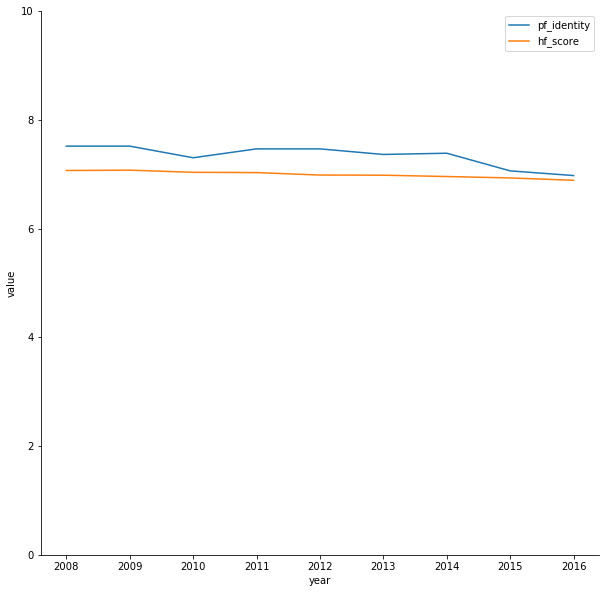

In [11]:
df = dataset[['year','pf_identity','hf_score']].groupby(['year']).mean().reset_index()

plt.figure(figsize=(10,10))
seaborn.lineplot(data=df, x='year', y='pf_identity', label='pf_identity')
seaborn.lineplot(data=df, x='year', y='hf_score', label='hf_score')
plt.ylabel('value')
plt.ylim(0, 10)
seaborn.despine()

## 2.2 - Graficas (hf_score .vs. year) de evolucion temporal de la libertad humana a  traves del tiempo, y por región.

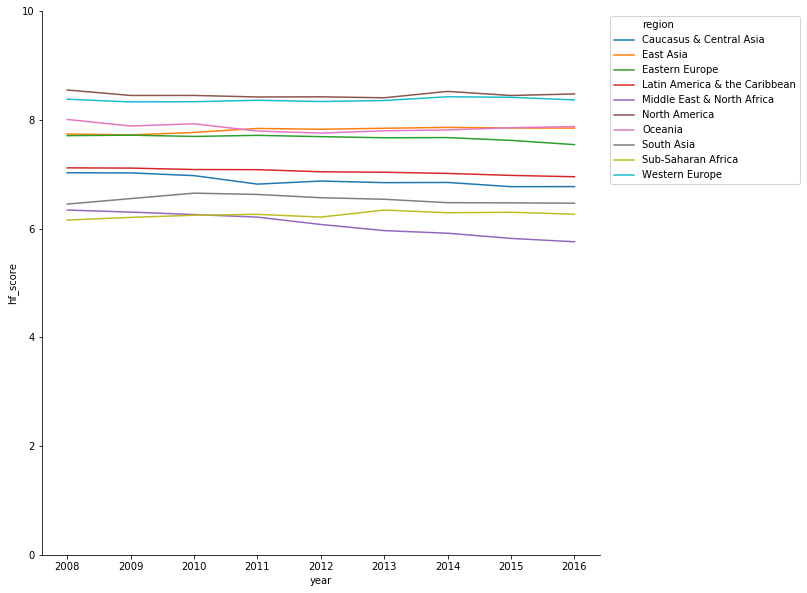

In [12]:
df_region = dataset[['year','pf_identity','hf_score','region']].groupby(['region','year']).mean().reset_index()

plt.figure(figsize=(10,10))
seaborn.lineplot(data=df_region, x='year', y='hf_score', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.ylim(0, 10)
seaborn.despine()

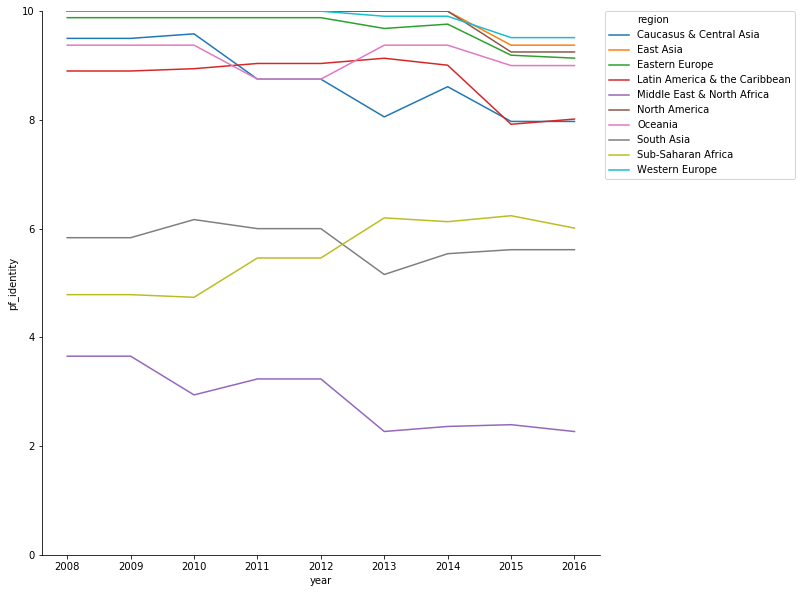

In [13]:
plt.figure(figsize=(10,10))
seaborn.lineplot(data=df_region, x='year', y='pf_identity', hue='region', ci='sd')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 10)
seaborn.despine()

Puede apreciarse que al graficar los datos separados en regiones la tendencia no es la misma, el mayor detalle permite obtenido permite describir mejor el comportamiento de la variable; puede notarse ademas un leve decaimiento para la region "Middle East & North Africa" que ademas tiene los valores mas bajos.

## 2.3 - Inspección de la tendencia en America Latina

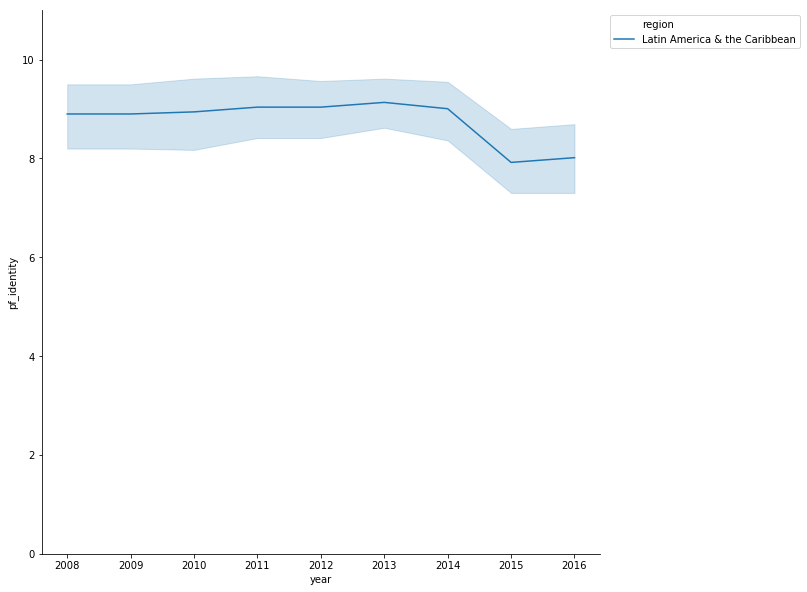

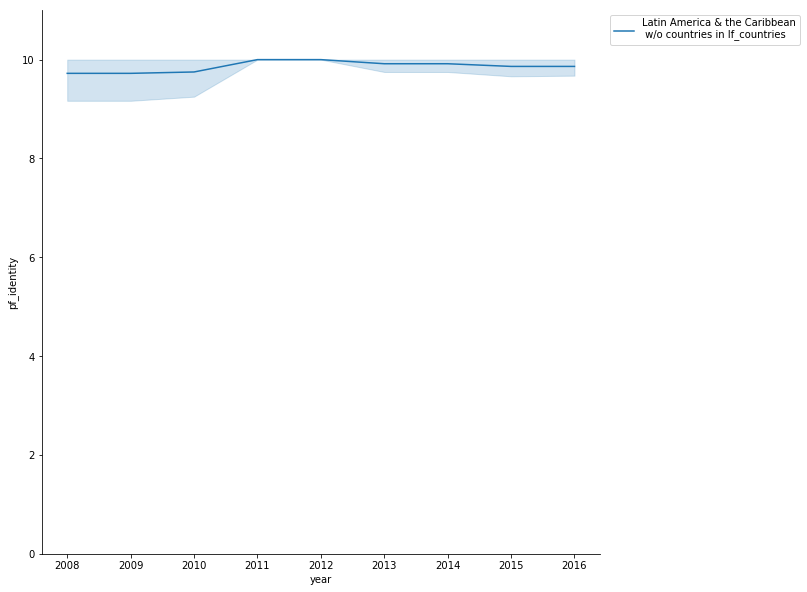

In [14]:
#Separamos los datos en Latino America & el Caribe
ds_latam_complete = dataset[dataset['region'] == 'Latin America & the Caribbean']
ds_latam = ds_latam_complete[['year','pf_identity','countries','region']]
last_years = ds_latam[ds_latam['year'] >= 2014]
less_freedom = last_years[last_years['pf_identity'] <= 8]

#Veo cuales paises tienen menos de 8 pf_indentity luego del 2014 que es cuando comienza la disminucion.
lf_countries = less_freedom.groupby(['countries']).mean()[['pf_identity']].reset_index()
ds_latam_wo = ds_latam[~ds_latam['countries'].isin(lf_countries['countries'])]

#Graficamos la curva para Latino America con estos paises.
plt.figure(figsize=(10,10))
seaborn.lineplot(data=ds_latam, x='year', y='pf_identity', hue='region')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.ylim(0,11)
seaborn.despine()

#y sin estos paises
plt.figure(figsize=(10,10))
seaborn.lineplot(data=ds_latam_wo, x='year', y='pf_identity', hue='region', color='#6BF178')
plt.legend(('Latin America & the Caribbean\n w/o countries in lf_countries',),bbox_to_anchor=(1.01, 1), loc=2)
plt.ylim(0,11)
seaborn.despine()

## 2 - DISTRIBUCIONES

## 2.1 - Histogramas de la distribución de la variable pf_identity (hf_score)

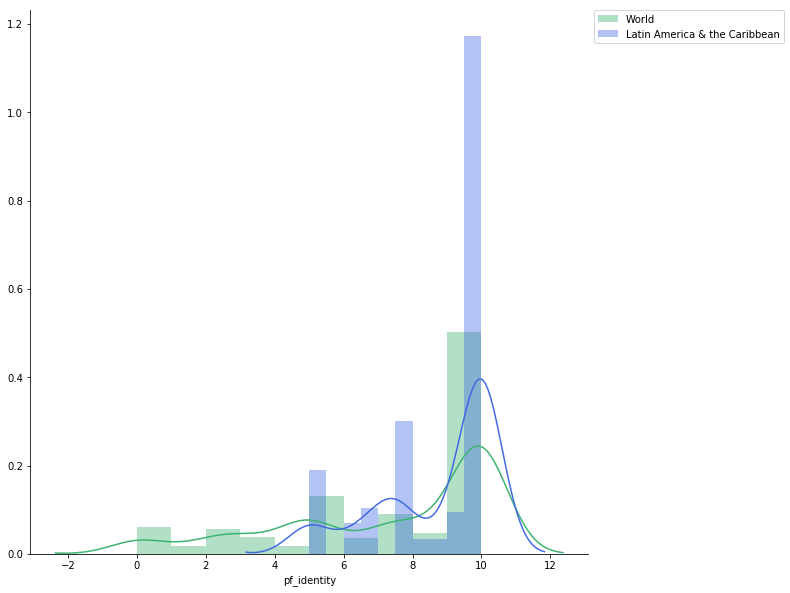

In [15]:
#Ploteamos pf_identity en forma global y para Latinoamerica y el caribe
plt.figure(figsize=(10,10))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10, color='mediumseagreen', label='World')
seaborn.distplot(ds_latam['pf_identity'].dropna(), bins=10, color='royalblue', label='Latin America & the Caribbean')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
seaborn.despine()

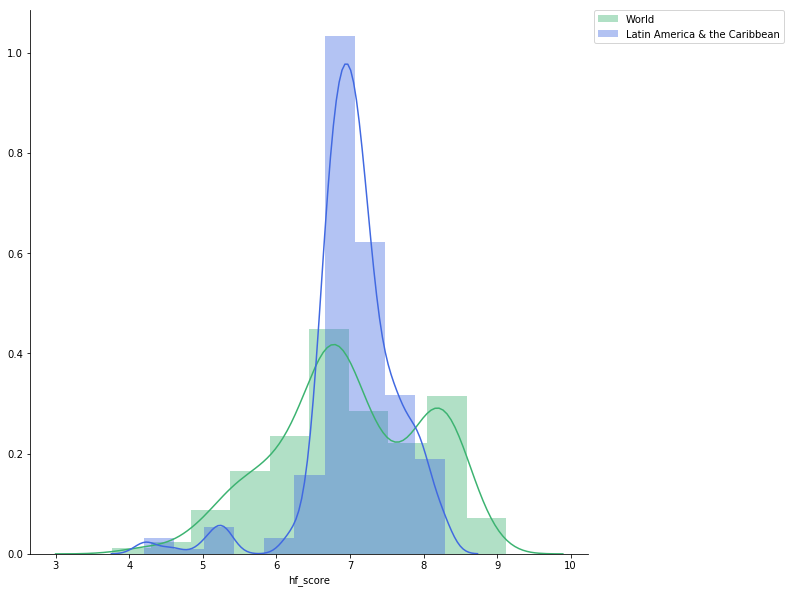

In [16]:
#Ploteamos hf_score en forma global y para Latinoamerica y el caribe
plt.figure(figsize=(10,10))
seaborn.distplot(dataset['hf_score'].dropna(), bins=10, color='mediumseagreen', label='World')
seaborn.distplot(ds_latam_complete['hf_score'].dropna(), bins=10, color='royalblue', label='Latin America & the Caribbean')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Las graficas no arrojan evidencia consistente sobre el tipo de distribucion al que obedece la muestra.

# 2.2 - Prueba de Kolmogorov-Smirnof

In [17]:
#Cálculo del test KS para el pf_indetity del dataset global
ds_world_pf = dataset['pf_identity']
mean_wpf, std_wpf = stats.norm.fit(ds_world_pf.dropna())
ds_world_pf_norm = (ds_world_pf - mean_wpf) / std_wpf
stats.kstest(ds_world_pf_norm.dropna(), 'norm')

KstestResult(statistic=0.2368216885475004, pvalue=1.7837097494493251e-68)

In [18]:
#Cálculo del test KS para el pf_indetity del dataset de America Latina
ds_latam_pf = ds_latam['pf_identity']
mean_lapf, std_lapf = stats.norm.fit(ds_latam_pf.dropna())
ds_latam_pf_norm = (ds_latam_pf - mean_lapf) / std_lapf
stats.kstest(ds_latam_pf_norm.dropna(), 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [19]:
#Cálculo del test KS para el hf_score del dataset global
ds_world_hf = dataset['hf_score']
mean_whf, std_whf = stats.norm.fit(ds_world_hf.dropna())
ds_world_hf_norm = (ds_world_hf - mean_whf) / std_whf
stats.kstest(ds_world_hf_norm.dropna(), 'norm')

KstestResult(statistic=0.06606589707833843, pvalue=1.1309978419994058e-05)

In [20]:
#Cálculo del test KS para el hf_score del dataset de America Latina
ds_latam_hf = ds_latam_complete['hf_score']
mean_lahf, std_lahf = stats.norm.fit(ds_latam_hf.dropna())
ds_latam_hf_norm = (ds_latam_hf - mean_lahf) / std_lahf
stats.kstest(ds_latam_hf_norm.dropna(), 'norm')

KstestResult(statistic=0.15003247403280606, pvalue=5.043599840583937e-05)

## 2.3 - Grafico QQ de la muestra para America Latina

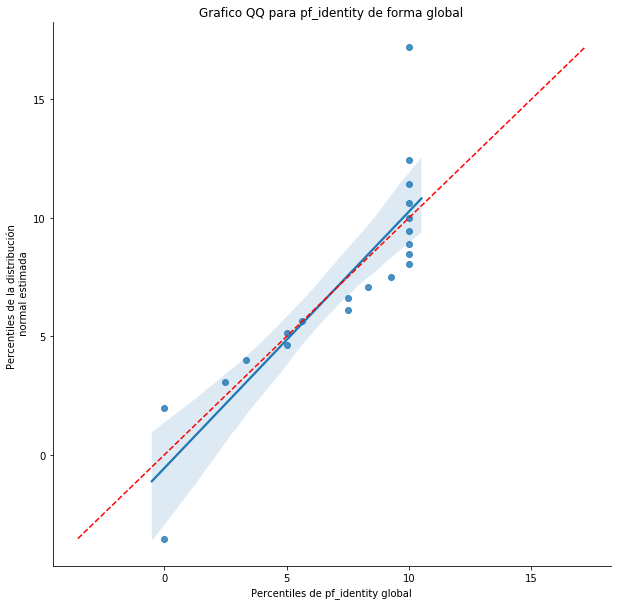

In [21]:
#Grafico QQ para pf_identity de forma global
norm_dist_wpf = stats.norm(mean_wpf, std_wpf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_wpf = numpy.percentile(ds_world_pf.dropna(), percs)
qn_norm_dist_wpf = numpy.percentile(norm_dist_wpf.rvs(len(ds_world_pf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_wpf, y=qn_norm_dist_wpf)
plt.xlabel('Percentiles de pf_identity global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para pf_identity de forma global')
x = numpy.linspace(numpy.min((qn_sample_wpf.min(), qn_norm_dist_wpf.min())), numpy.max((qn_sample_wpf.max(),qn_norm_dist_wpf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

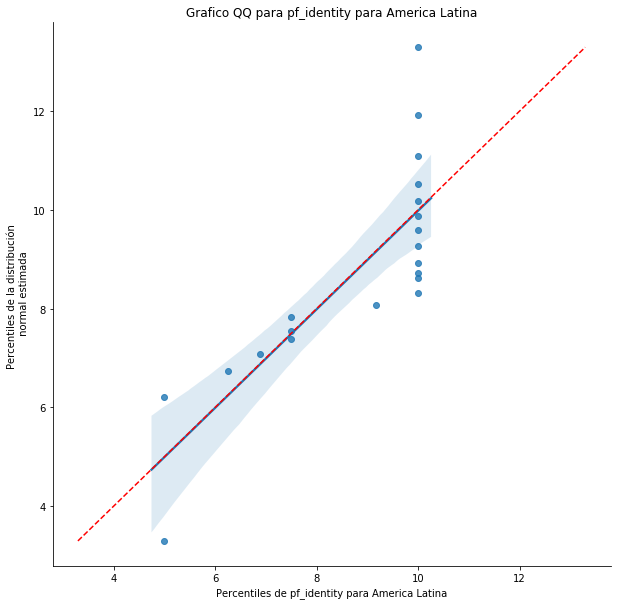

In [22]:
#Grafico QQ para pf_identity para America Latina
norm_dist_lapf = stats.norm(mean_lapf, std_lapf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_lapf = numpy.percentile(ds_latam_pf.dropna(), percs)
qn_norm_dist_lapf = numpy.percentile(norm_dist_lapf.rvs(len(ds_latam_pf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_lapf, y=qn_norm_dist_lapf)
plt.xlabel('Percentiles de pf_identity para America Latina')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para pf_identity para America Latina')
x = numpy.linspace(numpy.min((qn_sample_lapf.min(), qn_norm_dist_lapf.min())),
                   numpy.max((qn_sample_lapf.max(),qn_norm_dist_lapf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

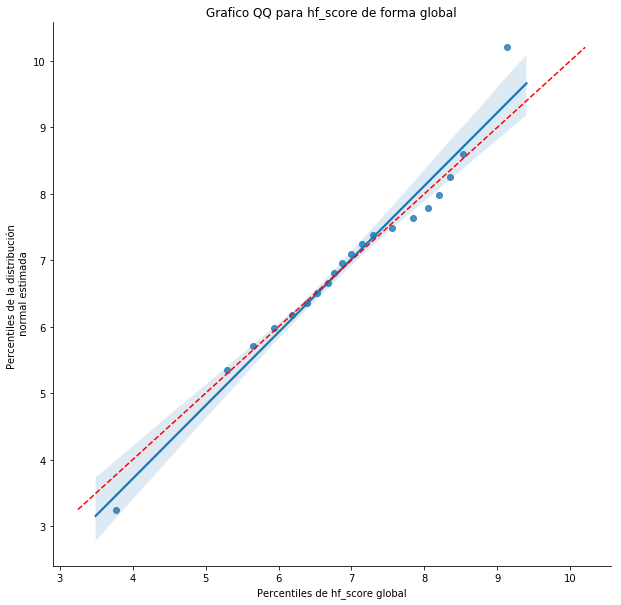

In [23]:
#Grafico QQ para hf_score de forma global
norm_dist_whf = stats.norm(mean_whf, std_whf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_whf = numpy.percentile(ds_world_hf.dropna(), percs)
qn_norm_dist_whf = numpy.percentile(norm_dist_whf.rvs(len(ds_world_hf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_whf, y=qn_norm_dist_whf)
plt.xlabel('Percentiles de hf_score global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para hf_score de forma global')
x = numpy.linspace(numpy.min((qn_sample_whf.min(), qn_norm_dist_whf.min())), 
                   numpy.max((qn_sample_whf.max(),qn_norm_dist_whf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

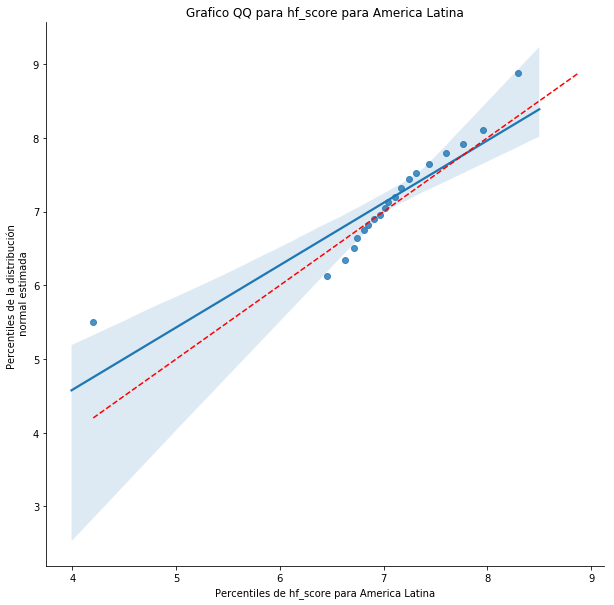

In [24]:
#Grafico QQ para hf_score para America Latina
norm_dist_lahf = stats.norm(mean_lahf, std_lahf)
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_lahf = numpy.percentile(ds_latam_hf.dropna(), percs)
qn_norm_dist_lahf = numpy.percentile(norm_dist_lahf.rvs(len(ds_latam_hf.dropna())), percs)

plt.figure(figsize=(10,10))
seaborn.regplot(x=qn_sample_lahf, y=qn_norm_dist_lahf)
plt.xlabel('Percentiles de hf_score para America Latina')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Grafico QQ para hf_score para America Latina')
x = numpy.linspace(numpy.min((qn_sample_lahf.min(), qn_norm_dist_lahf.min())), 
                   numpy.max((qn_sample_lahf.max(),qn_norm_dist_lahf.max())))
plt.plot(x,x, color='r', ls="--")
seaborn.despine()

## 2.4 - Medición de simetria y curtosis

In [25]:
#Cálculo de skewness y Curtosis para pf_identity 
kurt_wpf = ds_world_pf.kurtosis(axis=0, skipna=True)
skew_wpf = ds_world_pf.skew(axis=0, skipna=True)
kurt_lapf = ds_latam_pf.kurtosis(axis=0, skipna=True)
skew_lapf = ds_latam_pf.skew(axis=0, skipna=True)
sk_pf1 = {'Curtosis': [kurt_wpf, kurt_lapf],'Skewness': [skew_wpf, skew_lapf], 'Región':['Global', 'América Latina']}
sk_pf = pandas.DataFrame(data=sk_pf1)
sk_pf

,Curtosis,Skewness,Región
0,-0.411975,-0.913172,Global
1,-0.275455,-1.054675,América Latina


In [26]:
#Cálculo de skewness y Curtosis para hf_score
kurt_whf = ds_world_hf.kurtosis(axis=0, skipna=True)
skew_whf = ds_world_hf.skew(axis=0, skipna=True)
kurt_lahf = ds_latam_hf.kurtosis(axis=0, skipna=True)
skew_lahf = ds_latam_hf.skew(axis=0, skipna=True)
sk_hf1 = {'Curtosis': [kurt_whf, kurt_lahf],'Skewness': [skew_whf, skew_lahf], 'Región':['Global', 'América Latina']}
sk_hf = pandas.DataFrame(data=sk_hf1)
sk_hf

,Curtosis,Skewness,Región
0,-0.507680,-0.212283,Global
1,5.483406,-1.451494,América Latina


## 3 - Correlaciones

## 3.1 - Inspeccion de correlaciones con pairplot

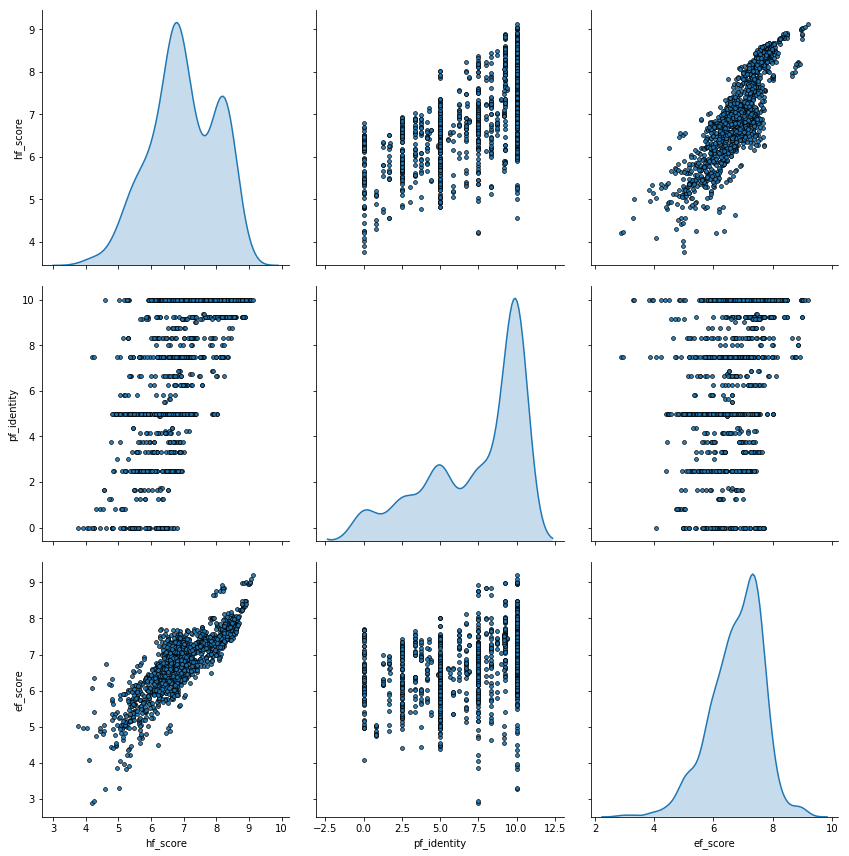

In [28]:
seaborn.pairplot(data=dataset, diag_kind="kde", plot_kws = {'alpha': 0.9, 's': 15, 'edgecolor': 'k'}, vars=['hf_score',
'pf_identity', 'ef_score'], height=4)
seaborn.despine()

Se puede ver con un simple grafico a pares, que existe una correlacion entre las variables ef_score y hf_score, tambien puede apreciarse el desbalance que posee la muestra para los valores que toma la variable pf_identity.

## 3.2 - Correlaciones entre hf_score, pf_identity y ef_score

Text(0, 0.5, 'hf_score')

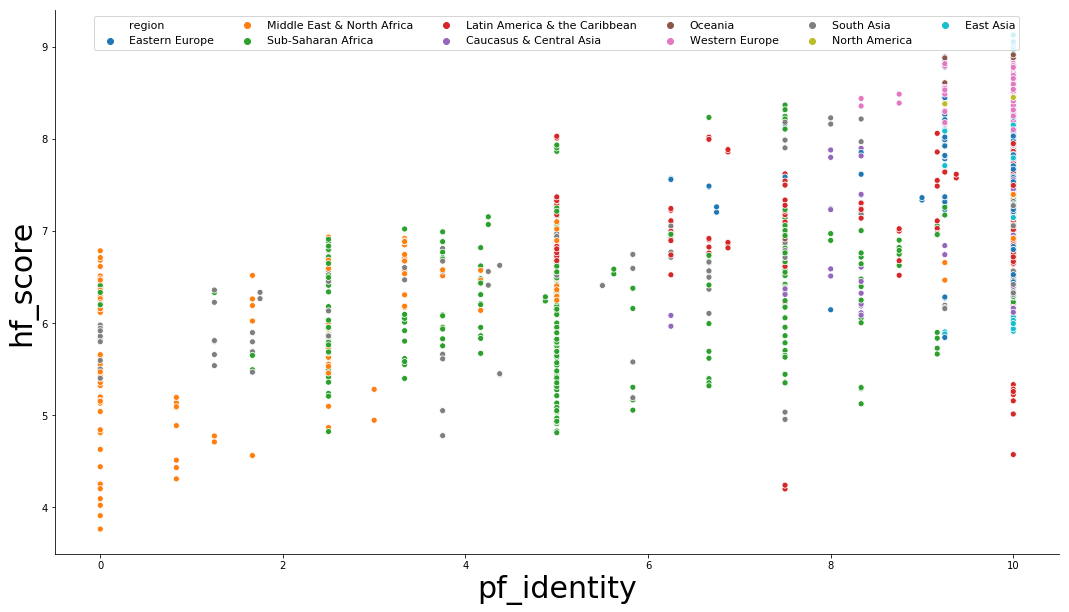

In [31]:
plt.figure(figsize=(18,10))
seaborn.scatterplot(data=dataset, x='pf_identity', y='hf_score', hue = 'region' )
seaborn.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=6, fancybox=True, fontsize=11)
plt.xlabel("pf_identity", fontsize=30)
plt.ylabel("hf_score", fontsize=30)

Graficar toda la muestra en simultaneao no permite en este caso apreciar la tendencia, haremos un analisis mas detallado.

Text(16.42500000000001, 0.5, 'hf_score')

<Figure size 288x288 with 0 Axes>

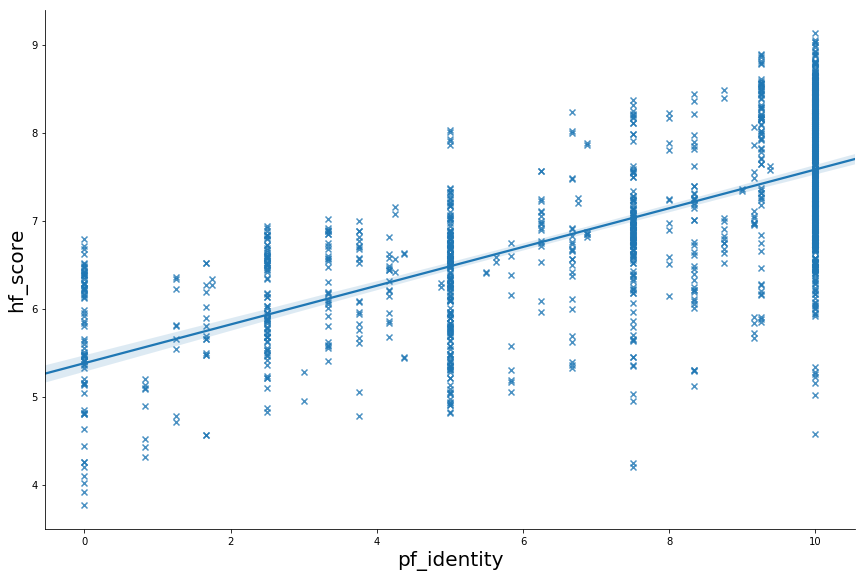

In [33]:
#En particular ajustamos linealmente el set de datos nos arrnojara una linea de tendencia, pero no tiene mucho sentido 
# evaluar esa "tendencia historica" sino mas bien una evolucion o lograr obtener una descripcion por regiones.
plt.figure(figsize=(4,4))
seaborn.lmplot(data=dataset, markers= "x", x='pf_identity', y='hf_score',height= 8, aspect= 1.5)

plt.xlabel("pf_identity", fontsize=30)
plt.xlabel("pf_identity", fontsize=20)
plt.ylabel("hf_score", fontsize=20)

## Podemos analizar la tendencia temporal entre las variables pf_identity y hf_score

(-0.1, 10.1)

<Figure size 216x216 with 0 Axes>

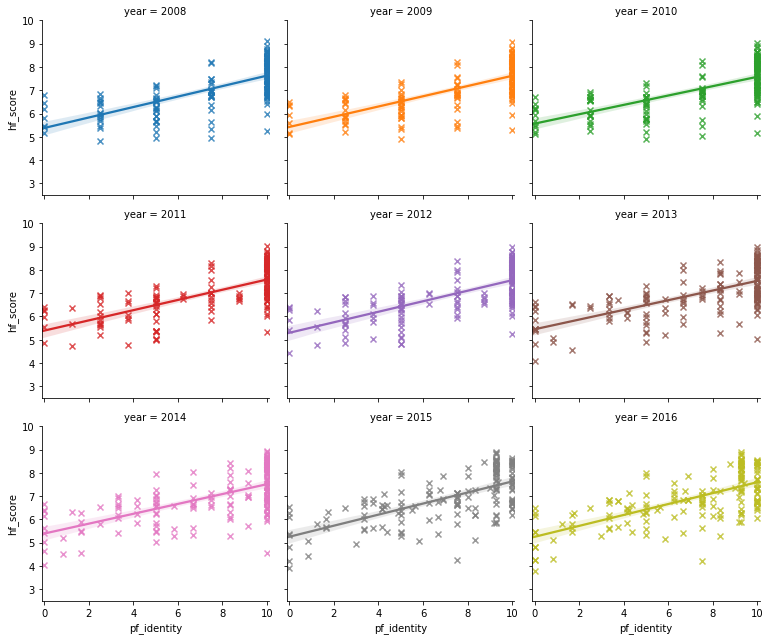

In [35]:
plt.figure(figsize=(3,3))
seaborn.lmplot(data=dataset, legend=True, markers= "x", x='pf_identity', y='hf_score', col="year", hue="year", height= 3, col_wrap=3, aspect= 1.2)
plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)

## Tambien podemos hacerlo por region

(-0.1, 10.1)

<Figure size 432x432 with 0 Axes>

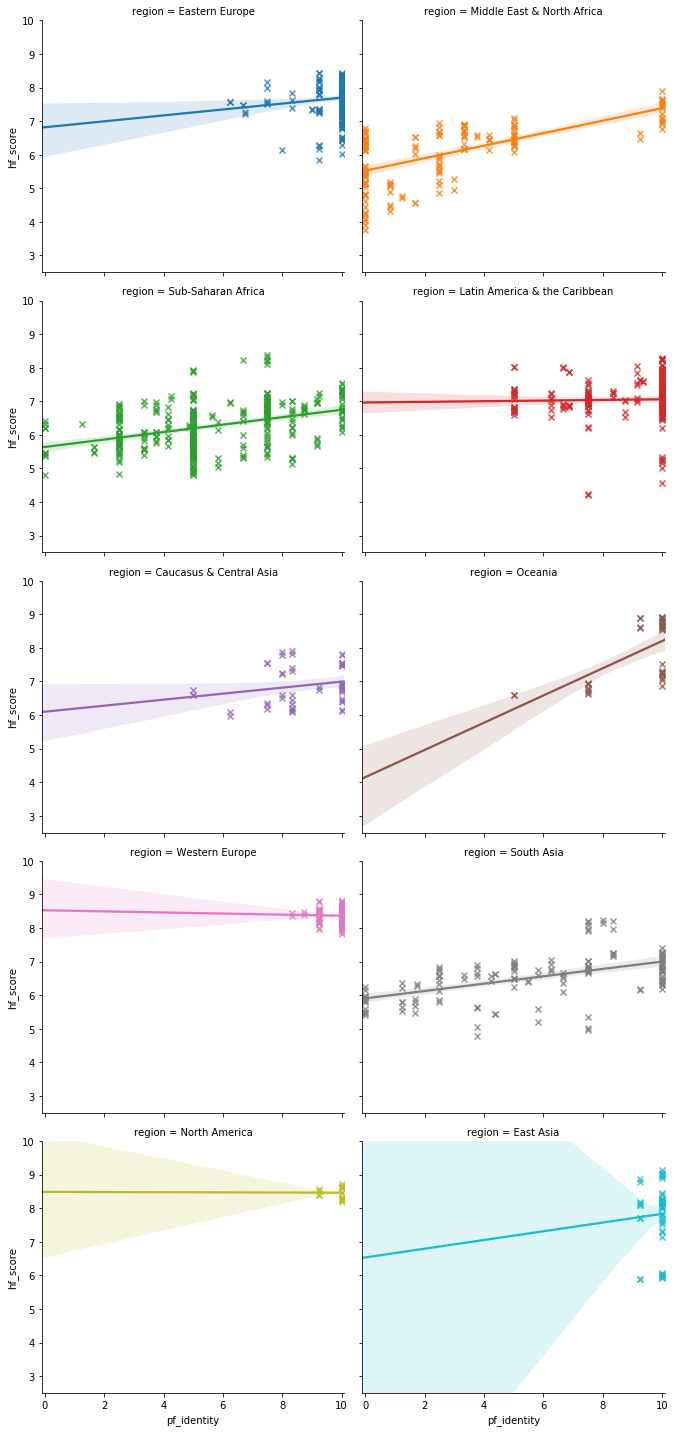

In [37]:
plt.figure(figsize=(6,6))
seaborn.lmplot(data=dataset, markers= "x", x='pf_identity', y='hf_score', col="region",col_wrap=2, hue="region", height= 4, aspect= 1.2)
plt.ylim(2.5,10)
plt.xlim(-0.1,10.1)